In [20]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
train = pd.read_excel("data/train.xlsx")

In [111]:
test = pd.read_excel("data/test (1).xlsx")

In [112]:
test = test.drop("Unnamed: 0", axis=1)

In [16]:
train0 = train[train["y"]==0]
train1 = train[train["y"]==1]

In [39]:
train.columns[2:]

Index(['a7_a1', 'a8_a2', 'a14_a13', 'a3', 'a4', 'a9', 'a10', 'a11', 'a12',
       'b1', 'b3', 'b5', 'b9', 'b12_b11', 'b13', 'b14', 'b18', 'b19_1', 'b20',
       'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b33',
       'b36', 'c4', 'c10', 'c12', 'c13', 'c14', 'c15'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

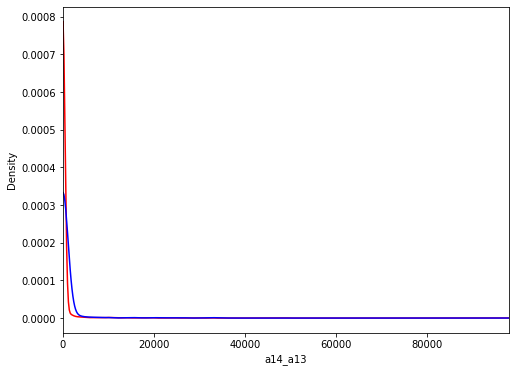

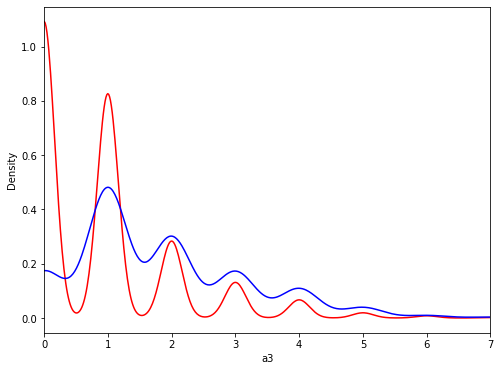

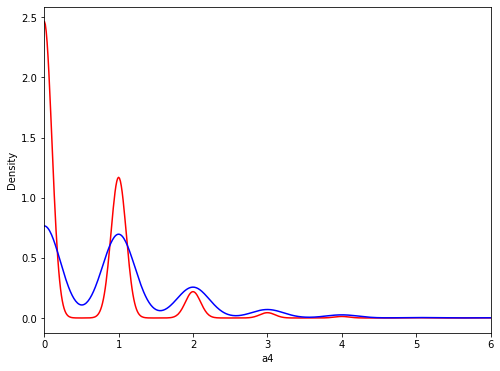

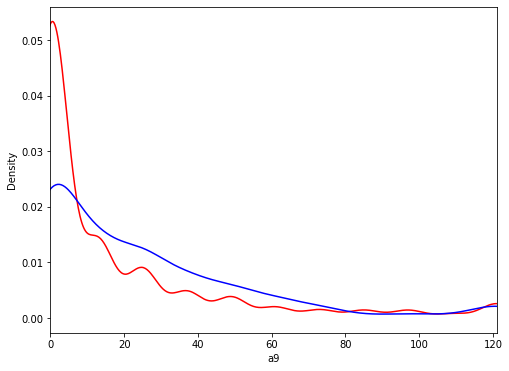

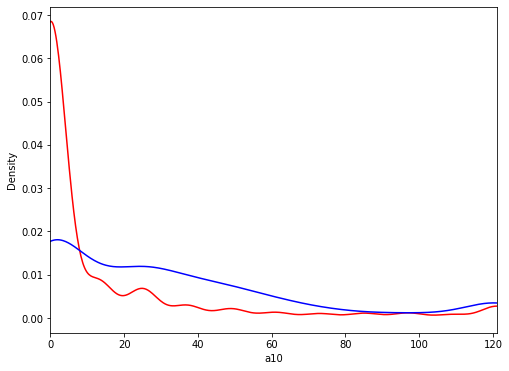

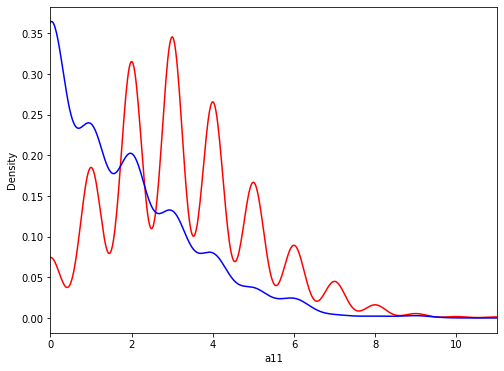

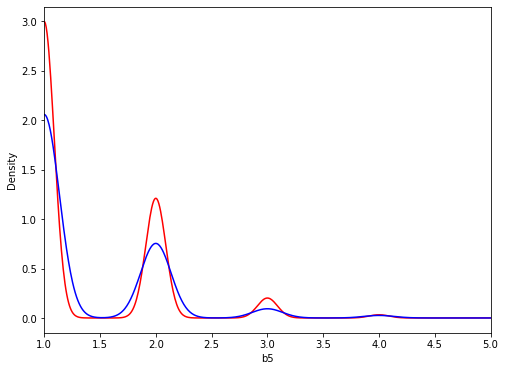

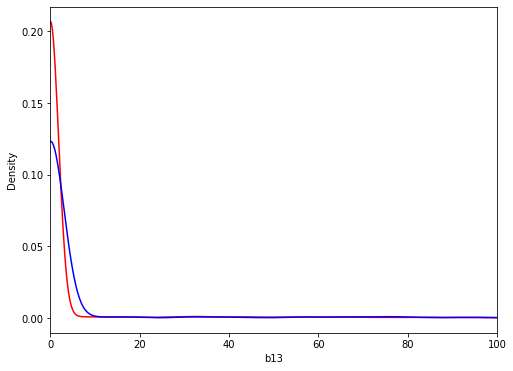

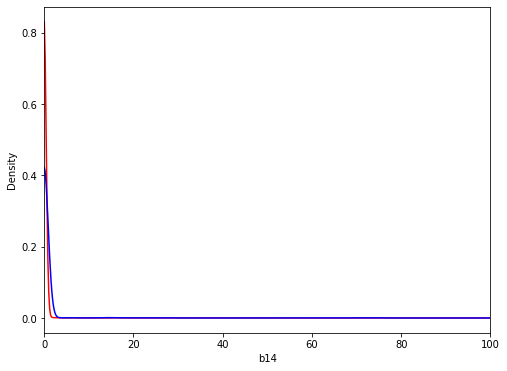

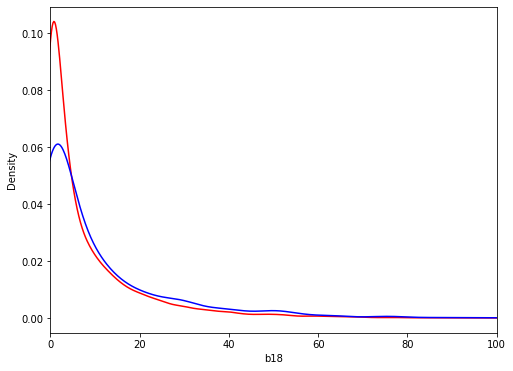

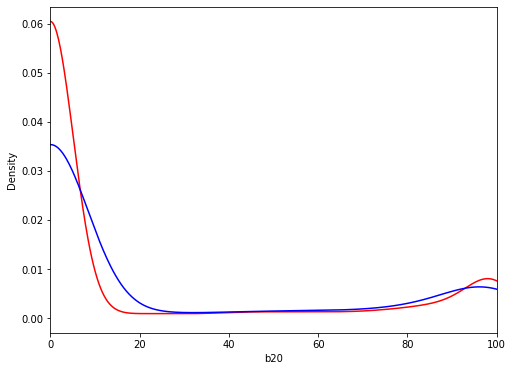

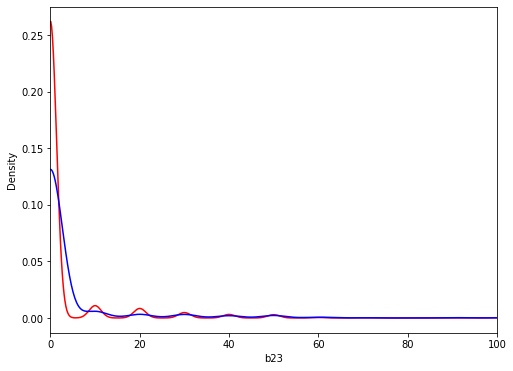

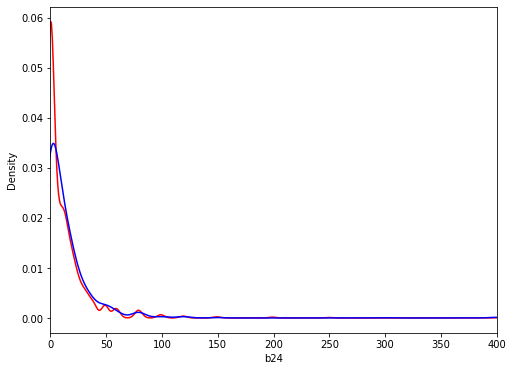

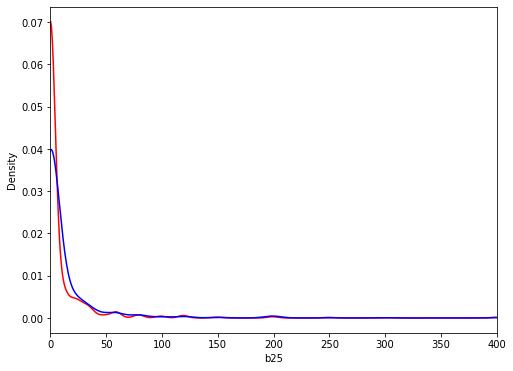

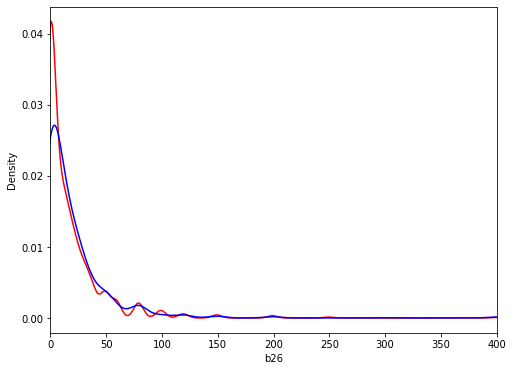

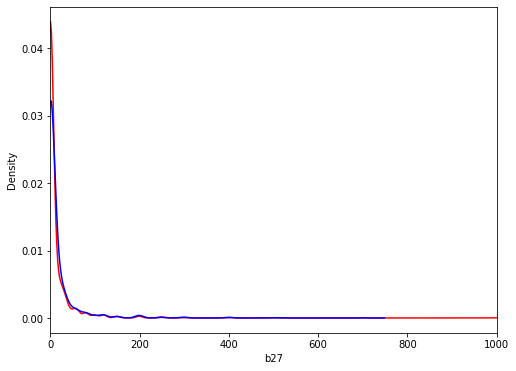

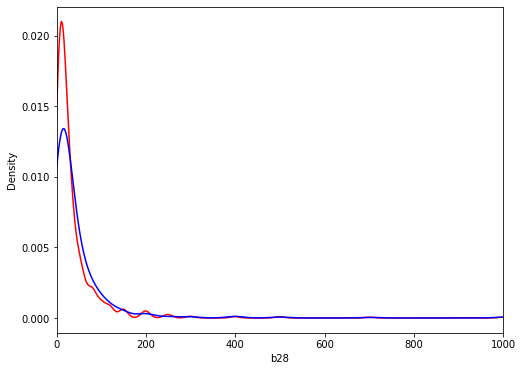

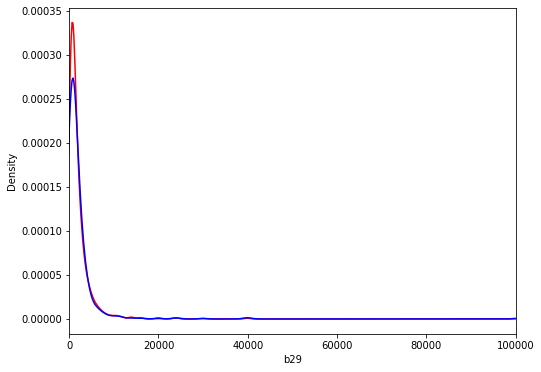

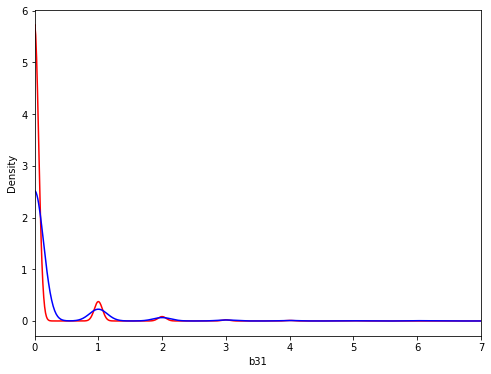

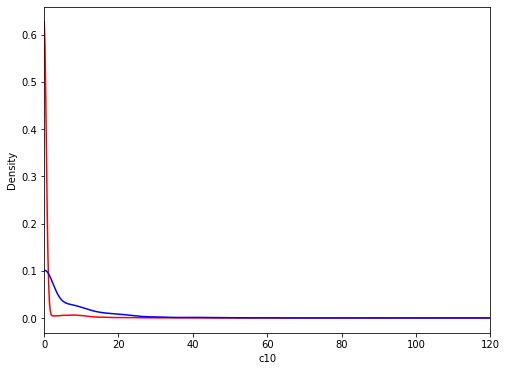

In [46]:
number_col = train.dtypes[train.dtypes!=object].index[2:]
for i in number_col:
    plt.figure(figsize=(8, 6))
    train0[i].plot(kind='kde', color="red")
    train1[i].plot(kind='kde', color = "blue")

    plt.xlabel(i)
    plt.xlim((train[i].min(), train[i].max()))

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)


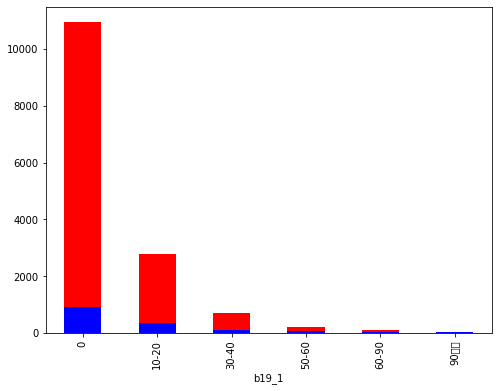

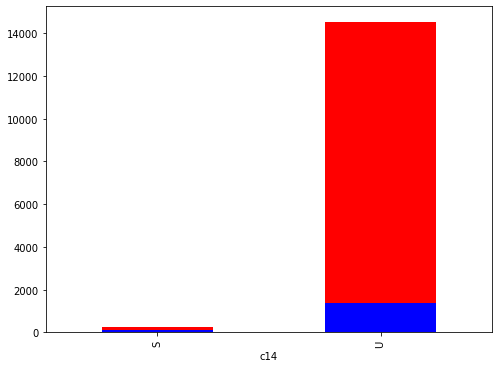

In [63]:
cat_col = train.dtypes[train.dtypes==object].index[2:]
df2 = train.groupby(train.y).count()
for i in cat_col:
    plt.figure(figsize=(8, 6))
    train0[i].groupby(train0[i]).count().plot(kind='bar', color="red")
    train1[i].groupby(train1[i]).count().plot(kind='bar', color="blue")
    plt.xlabel(i)
    #plt.xlim((train[i].min(), train[i].max()))

In [74]:
cat_col

Index(['b19_1', 'c13', 'c14'], dtype='object')

In [99]:
selected_col = ["a7_a1", "a3", "a4", "a9", "a10", "a11", "a12", "b20", "b23", "b31", "b33", "c4", "c10", "c12",  "c15","G",	"K"	,"O & D","R" ]

In [113]:
train_x

a7_a1  a3  a4  a9  a10  a11  a12  b20  b23  b31  b33  c4  c10  c12  \
0          0.10   2   0  25    0    3  121    0    0    0    0   2    0    0   
1          0.00   3   2  85  121    1   85    0    0    0    0  10   34   63   
2          0.00   1   1  25   25    2   97    0    0    0    0   4    7    7   
3          0.00   5   2   1   37    4   97    0    0    0    2   4    7   45   
4          0.00   2   0   1   37    4   97    0    0    0    2   5    0    6   
...         ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...   
16242  25200.10   0   0   0    0    6  121    0    0    0    0   3    0    0   
16243      0.00   1   0   0    0    3  121   26   20    0    0   3    0    0   
16244  14100.10   0   0   0    0    3  121   99   10    1   30   1    0    0   
16245      0.00   2   0   0    0    5   97   88   10    0    0   7    0   26   
16246    450.05   1   0   0    0    6  121    0    0    0    0   3    0    0   

       c15  G  K  O & D  R  
0        0  0  0      1  0  
1        0  1  0      0  0  
2        9  1  0      0  0  
3        0  0  0      0  1  
4       12  1  0      0  0  
...    ... .. ..    ... ..  
16242    0  0  0      1  0  
16243    0  0  0      1  0  
16244    0  0  1      0  0  
16245   68  0  0      1  0  
16246   42  0  0      1  0  

[16247 rows x 19 columns]

In [114]:
traincon = pd.concat([train, pd.get_dummies(train["c13"])], axis=1)

In [115]:
train_x = traincon[selected_col]
train_y = traincon["y"]

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
model = GradientBoostingClassifier()

In [104]:
model.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [116]:
testcon = pd.concat([test, pd.get_dummies(test["c13"])], axis=1)

In [117]:
test_x = testcon[selected_col]
test_y = testcon["y"]

In [118]:
test_x

a7_a1  a3  a4  a9  a10  a11  a12  b20  b23  b31  b33  c4  c10  \
0        0.000000   3   1   0    0    6  121    0    0    0    0   7    9   
1     1500.100000   2   0   1    1    5   61    0    0    0    1   6    0   
2        0.000000   1   1  13   13    1  109    0    0    0    1   3    0   
3        0.000000   1   0  37   37    1   97    0    0    0    1   3    0   
4        0.000000   1   1   0    0    0    0    0    0    0    1   2    4   
...           ...  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ..  ...   
6958   600.100000   1   0  13    0    3   13    0    0    0    8   3    0   
6959   300.100000   0   0   1    0    3    1    0    0    0    0   8    0   
6960     0.000000   1   1   1    1    3  121    0    0    0   10   3    0   
6961  5300.033333   0   0  49    0    5  121    0    0    0    0   5   36   
6962  2700.100000   0   0   0    0    3   25   70    0    0    2   4    0   

      c12  c15  G  K  O & D  R  
0      28    0  1  0      0  0  
1       0    0  0  0      1  0  
2       5    0  0  0      1  0  
3       0   11  0  1      0  0  
4       6    1  0  0      1  0  
...   ...  ... .. ..    ... ..  
6958    0    0  0  0      1  0  
6959    0   49  0  1      0  0  
6960    0   21  0  0      1  0  
6961   26    0  1  0      0  0  
6962    0    0  0  1      0  0  

[6963 rows x 19 columns]

In [119]:
pre_y = model.predict(test_x)

In [123]:
from sklearn.metrics import f1_score, confusion_matrix

In [124]:
f1_score(test_y, pre_y)

0.43678160919540227

In [125]:
confusion_matrix(test_y, pre_y)

array([[6215,  115],
       [ 424,  209]])

In [129]:
a = 209/324

In [130]:
b = 209/633

In [133]:
(2*a*b)/(a+b)

0.43678160919540227